In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
#from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lisun/nltk_data...


In [6]:
df['scores'] = df['Review'].apply(lambda hotel_overview: sid.polarity_scores(str(hotel_overview)))
df

,Review,Rating,scores
0,nice hotel expensive parking got good deal sta...,4,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co..."
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com..."
2,nice rooms not 4* experience hotel monaco seat...,3,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp..."
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com..."
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co..."
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,"{'neg': 0.063, 'neu': 0.665, 'pos': 0.272, 'co..."
20487,great location price view hotel great quick pl...,4,"{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou..."
20488,"ok just looks nice modern outside, desk staff ...",2,"{'neg': 0.131, 'neu': 0.724, 'pos': 0.145, 'co..."
20489,hotel theft ruined vacation hotel opened sept ...,1,"{'neg': 0.15, 'neu': 0.671, 'pos': 0.179, 'com..."


In [7]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'
df.head()

,Review,Rating,scores,compound,sentiment_type
0,nice hotel expensive parking got good deal sta...,4,"{'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co...",0.9747,POSITIVE
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787,POSITIVE
2,nice rooms not 4* experience hotel monaco seat...,3,"{'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp...",0.9889,POSITIVE
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912,POSITIVE
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797,POSITIVE


<AxesSubplot:title={'center':'sentiment analysis'}>

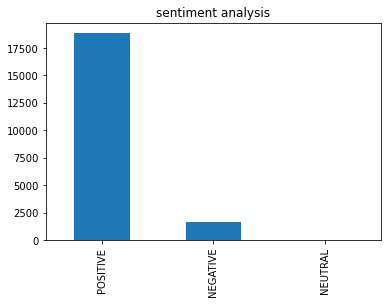

In [8]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [9]:
df2 = df[['Review','sentiment_type','compound', 'Rating']]
df2

,Review,sentiment_type,compound,Rating
0,nice hotel expensive parking got good deal sta...,POSITIVE,0.9747,4
1,ok nothing special charge diamond member hilto...,POSITIVE,0.9787,2
2,nice rooms not 4* experience hotel monaco seat...,POSITIVE,0.9889,3
3,"unique, great stay, wonderful time hotel monac...",POSITIVE,0.9912,5
4,"great stay great stay, went seahawk game aweso...",POSITIVE,0.9797,5
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",POSITIVE,0.9834,5
20487,great location price view hotel great quick pl...,POSITIVE,0.9753,4
20488,"ok just looks nice modern outside, desk staff ...",POSITIVE,0.2629,2
20489,hotel theft ruined vacation hotel opened sept ...,POSITIVE,0.9867,1
